# Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
matches_df=pd.read_csv("C:\\Users\Aryanaman\Desktop\EDA\matches.csv")
deliveries_df=pd.read_csv("C:\\Users\Aryanaman\Desktop\EDA\deliveries.csv")

In [42]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [43]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


# Data Information

In [44]:
print(matches_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [45]:
print(deliveries_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [46]:
matches_df['umpire2'].isnull().sum()

np.int64(0)

In [47]:
matches_df['umpire1'].isnull().sum()

np.int64(0)

In [48]:
matches_df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [49]:
#Matches we have got ib our dataset
matches_df['id'].max()

np.int64(1426312)

In [50]:
#Season we have got in our dataset
matches_df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [51]:
# All the player of match in our dataset 
matches_df['player_of_match'].unique()

array(['BB McCullum', 'MEK Hussey', 'MF Maharoof', 'MV Boucher',
       'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden', 'YK Pathan',
       'KC Sangakkara', 'JDP Oram', 'AC Gilchrist', 'SM Katich',
       'MS Dhoni', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'IK Pathan', 'P Kumar', 'SM Pollock',
       'Sohail Tanvir', 'S Sreesanth', 'A Nehra', 'SC Ganguly',
       'L Balaji', 'Shoaib Akhtar', 'A Mishra', 'DPMD Jayawardene',
       'GC Smith', 'DJ Bravo', 'M Ntini', 'SP Goswami', 'A Kumble',
       'KD Karthik', 'JA Morkel', 'R Vinay Kumar', 'Umar Gul', 'SK Raina',
       'CRD Fernando', 'SR Tendulkar', 'R Dravid', 'DL Vettori',
       'RP Singh', 'M Muralitharan', 'CH Gayle', 'AB de Villiers',
       'RS Bopara', 'PP Ojha', 'TM Dilshan', 'HH Gibbs', 'DP Nannes',
       'JP Duminy', 'Yuvraj Singh', 'SB Jakati', 'JH Kallis', 'G Gambhir',
       'RG Sharma', 'A Singh', 'S Badrinath', 'DR Smith', 'LRPL Taylor',
       'Harbhajan Singh', 'R Bhatia', 'SK Warne', 'B

## Team won by Max runs

In [52]:
matches_df.iloc[matches_df['target_runs'].idxmax()]

id                                          1426268
season                                         2024
city                                      Bengaluru
date                                     2024-04-15
match_type                                   League
player_of_match                             TM Head
venue              M Chinnaswamy Stadium, Bengaluru
team1                           Sunrisers Hyderabad
team2                   Royal Challengers Bengaluru
toss_winner             Royal Challengers Bengaluru
toss_decision                                 field
winner                          Sunrisers Hyderabad
result                                         runs
result_margin                                  25.0
target_runs                                   288.0
target_overs                                   20.0
super_over                                        N
method                                          NaN
umpire1                                AK Chaudhary
umpire2     

In [53]:
matches_df.loc[matches_df['target_runs'].idxmax(),['winner','date']]        #iloc[] is used for integer-based indexing, so matches_df.iloc[matches_df['target_runs'].idxmax()] fetches a single row.
#loc[] can directly fetch multiple columns.

winner    Sunrisers Hyderabad
date               2024-04-15
Name: 1053, dtype: object

### Observation
''Sunrisers Hyderabad won the match with the highest margin of runs (25 runs) in the given dataset.
The match was played in Bengaluru during the 2024 season''

## Team won by Max wickets

In [54]:
matches_df.iloc[matches_df['target_overs'].idxmax()]

id                                      335982
season                                 2007/08
city                                 Bangalore
date                                2008-04-18
match_type                              League
player_of_match                    BB McCullum
venue                    M Chinnaswamy Stadium
team1              Royal Challengers Bangalore
team2                    Kolkata Knight Riders
toss_winner        Royal Challengers Bangalore
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                            140.0
target_runs                              223.0
target_overs                              20.0
super_over                                   N
method                                     NaN
umpire1                              Asad Rauf
umpire2                            RE Koertzen
Name: 0, dtype: object

In [55]:
matches_df.loc[matches_df['target_overs'].idxmax(),['winner','date']]

winner    Kolkata Knight Riders
date                 2008-04-18
Name: 0, dtype: object

### Observation
Kolkata Knight Riders achieved the biggest victory margin in terms of runs (140 runs).
This match took place in the first IPL season (2007/08).
Brendon McCullum (BB McCullum) played a key role (likely due to his iconic 158* in the opening match of IPL history).

## Team won by min runs

In [56]:
matches_df.loc[matches_df[matches_df['target_runs'].ge(1)].target_runs.idxmin(),['winner','team1','date','result_margin','season','target_runs','target_overs','method']]

winner           Sunrisers Hyderabad
team1               Delhi Daredevils
date                      2014-05-10
result_margin                    8.0
season                          2014
target_runs                     43.0
target_overs                     5.0
method                           D/L
Name: 429, dtype: object

### Observation
Sunrisers Hyderabad won by just 8 runs, the smallest margin in terms of runs.
The match was affected by rain and was decided using the D/L method, leading to a shortened 5-over chase.

## Season which had most number of matches

C:\Users\Aryanaman\AppData\Local\Temp\ipykernel_7424\1351708592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season',data=matches_df,palette='viridis')


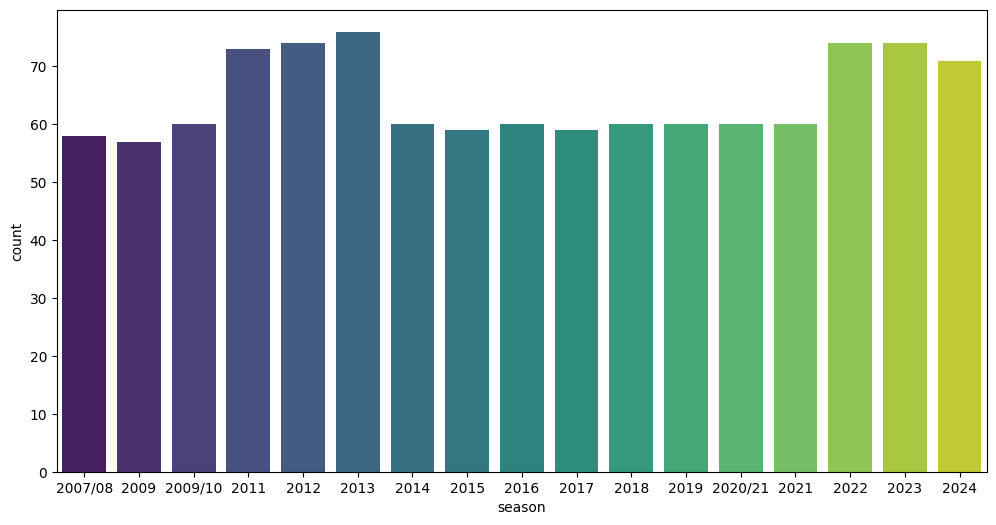

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',data=matches_df,palette='viridis')
plt.show()

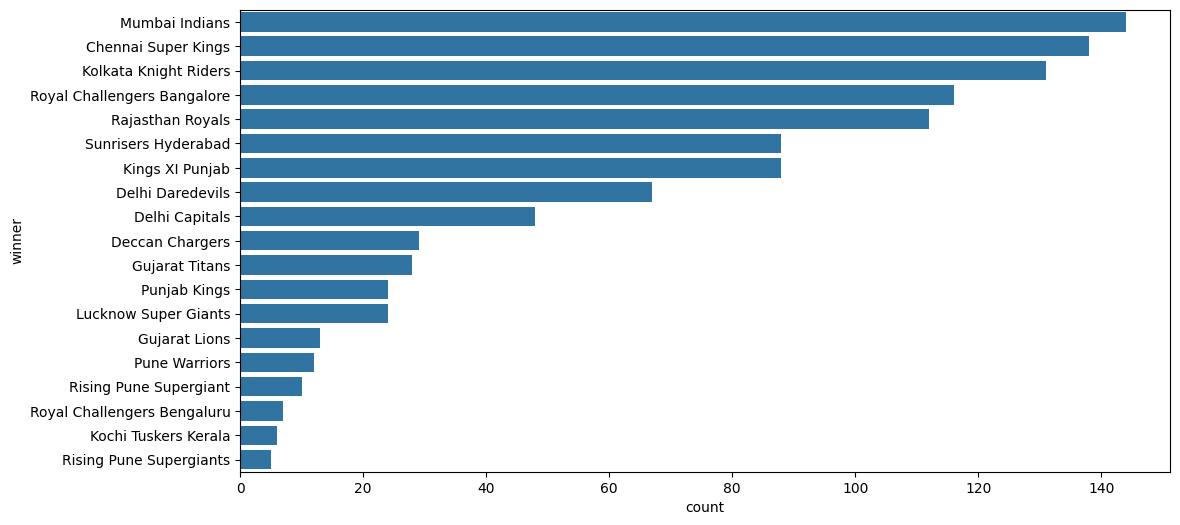

In [58]:
plt.figure(figsize=(12,6))
data=matches_df.winner.value_counts()
sns.barplot(y=data.index,x=data,orient='h')
plt.show()

### Top Player of the match winner


In [59]:
top_players=matches_df.player_of_match.value_counts()
print(top_players)

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
                  ..
R Shepherd         1
Akash Madhwal      1
Shashank Singh     1
WD Parnell         1
RR Rossouw         1
Name: count, Length: 291, dtype: int64


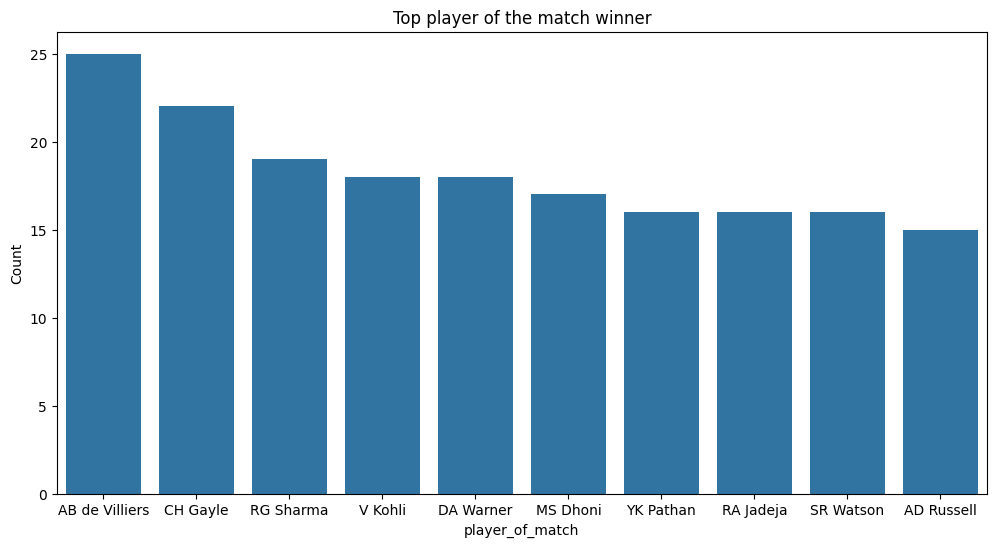

In [60]:
top_player1=matches_df.player_of_match.value_counts()[:10]
plt.figure(figsize=(12,6))

sns.barplot(x=top_player1.index,y=top_player1,orient='v')
plt.ylabel("Count")
plt.title("Top player of the match winner")
plt.show()


>> AB de Villiers is the most Successful player in all match 

### Number of matches in each venue

In [61]:
venue_counts=matches_df['venue'].value_counts()
print(venue_counts)

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

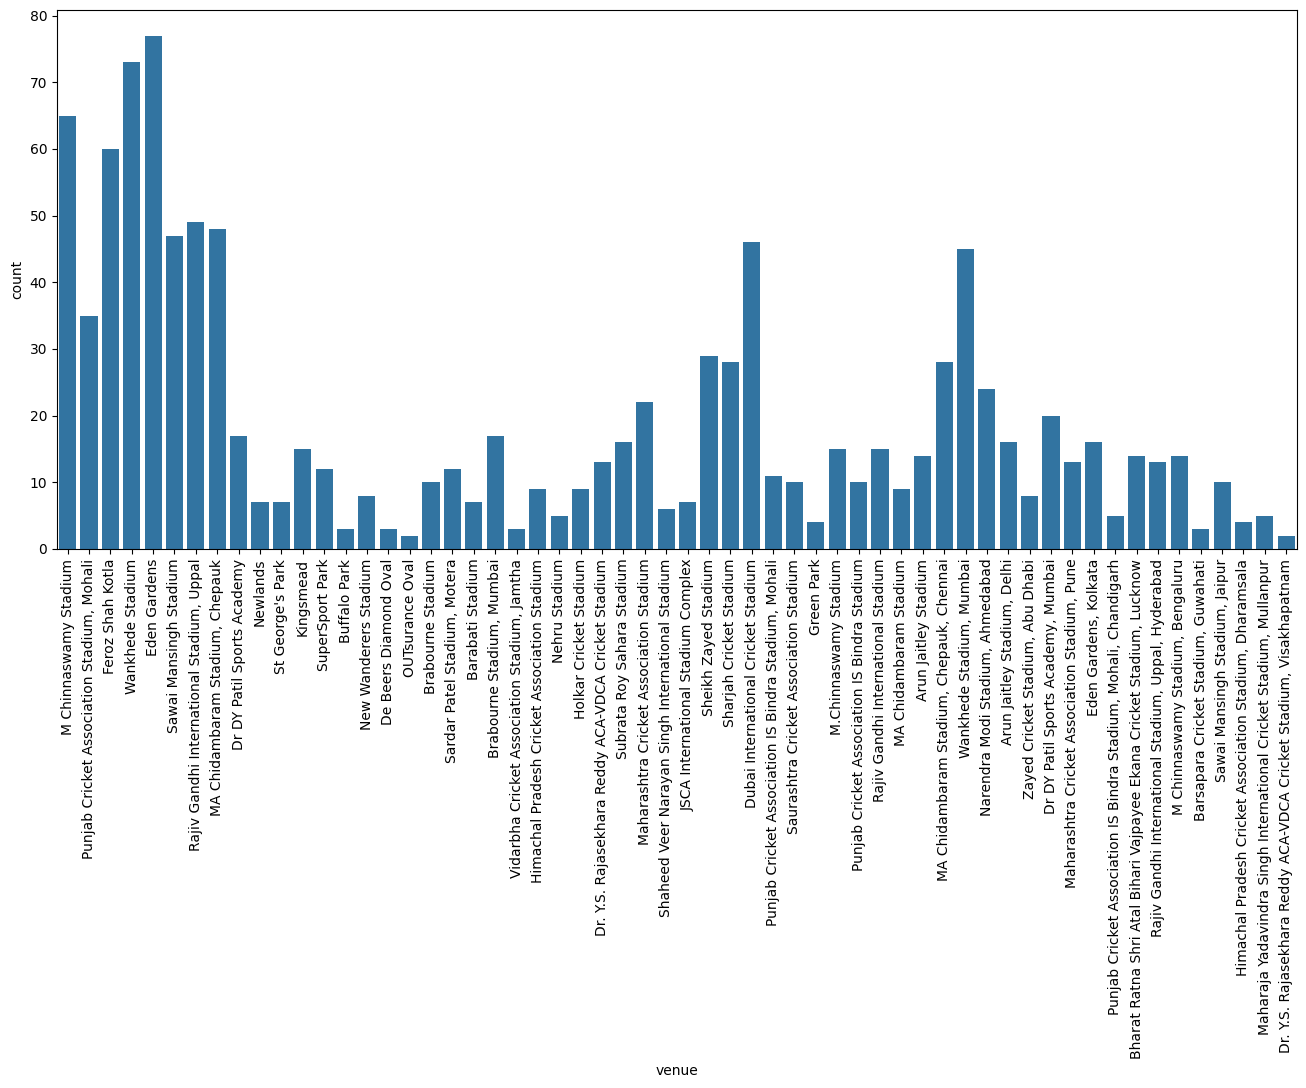

In [62]:
plt.figure(figsize=(16,7))
sns.countplot(x='venue',data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

### Number of matches played by each team:

Unique Teams: ['Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Chennai Super Kings', 'Rajasthan Royals', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Delhi Daredevils', 'Delhi Capitals', 'Deccan Chargers', 'Punjab Kings', 'Pune Warriors', 'Gujarat Titans', 'Lucknow Super Giants', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bengaluru', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']


C:\Users\Aryanaman\AppData\Local\Temp\ipykernel_7424\821966115.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, palette='coolwarm',)


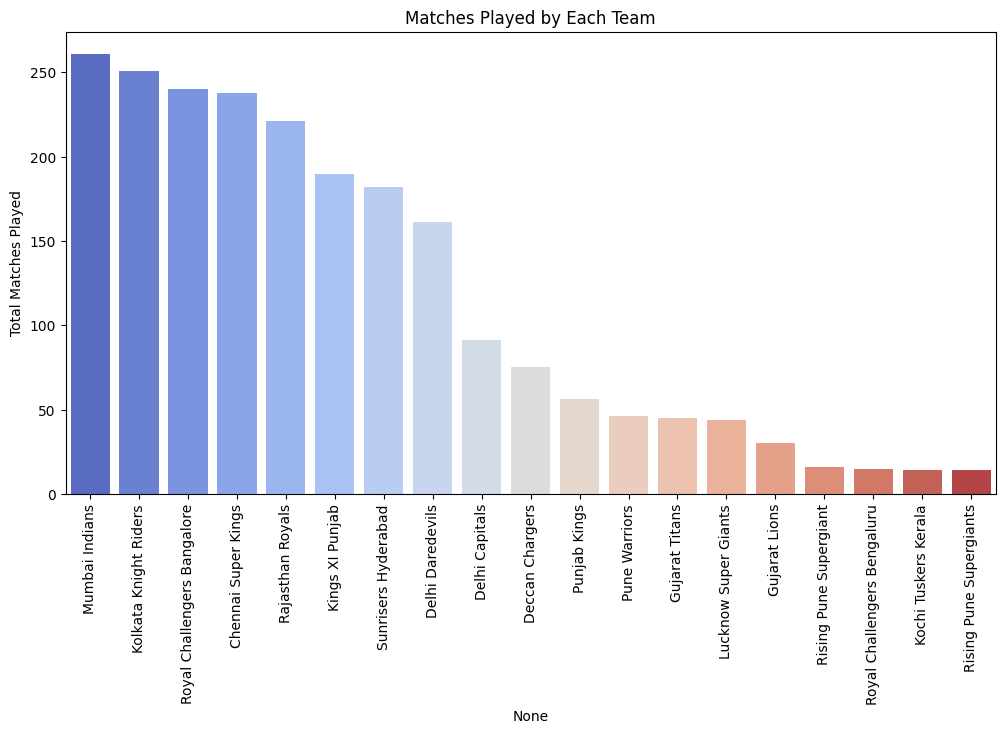

In [63]:
# Combine 'team1' and 'team2' columns to count total matches played by each team
team_counts = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()
team_counts = team_counts.sort_values(ascending=False)

print("Unique Teams:", list(team_counts.index))

plt.figure(figsize=(12,6))
sns.barplot(x=team_counts.index, y=team_counts.values, palette='coolwarm',)

plt.xticks(rotation='vertical')
plt.ylabel('Total Matches Played')
plt.title('Matches Played by Each Team')

plt.show()


>> "Mumbai Indians" lead the pack with most number of matches played followed by "KKR". There are also teams with very few matches like 'Rising Pune Supergiants', 'Gujarat Titans' as they are new teams that came in only last season.

### Number of wins per team:

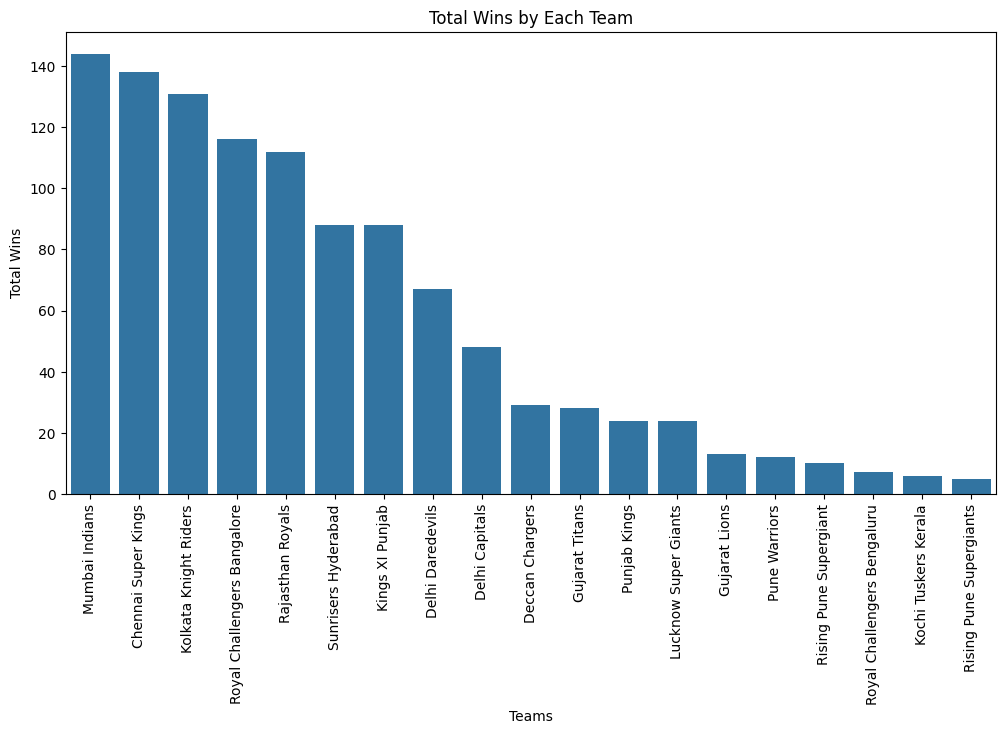

In [64]:
plt.figure(figsize=(12,6))
winner_counts = matches_df['winner'].value_counts()

sns.barplot(x=winner_counts.index, y=winner_counts.values)

plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Total Wins')
plt.title('Total Wins by Each Team')
plt.show()


>> MI again Leads the pack followed by CSK.

### Champions each season:

In [65]:
temp_df=matches_df.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
temp_df

,season,winner
0,2007/08,Rajasthan Royals
1,2009,Deccan Chargers
2,2009/10,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


### Toss Decision

In [66]:
temp_series=matches_df.toss_decision.value_counts()
temp_series

toss_decision
field    704
bat      391
Name: count, dtype: int64

Text(0.5, 1.0, 'Toss Decision Percentage')

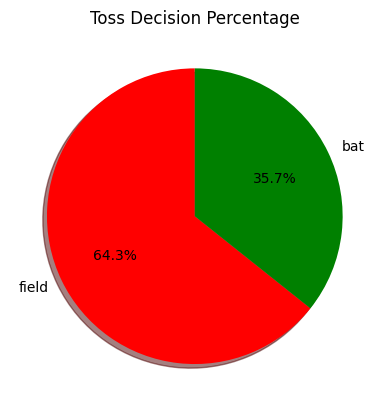

In [67]:
labels=(np.array(temp_series.index))
sizes=(np.array(temp_series/temp_series.sum())*100)
colors=['red','green']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss Decision Percentage")

>> Almost 64.3% of the toss decisions are made to field first. Now let us see how this decision varied over time.]:

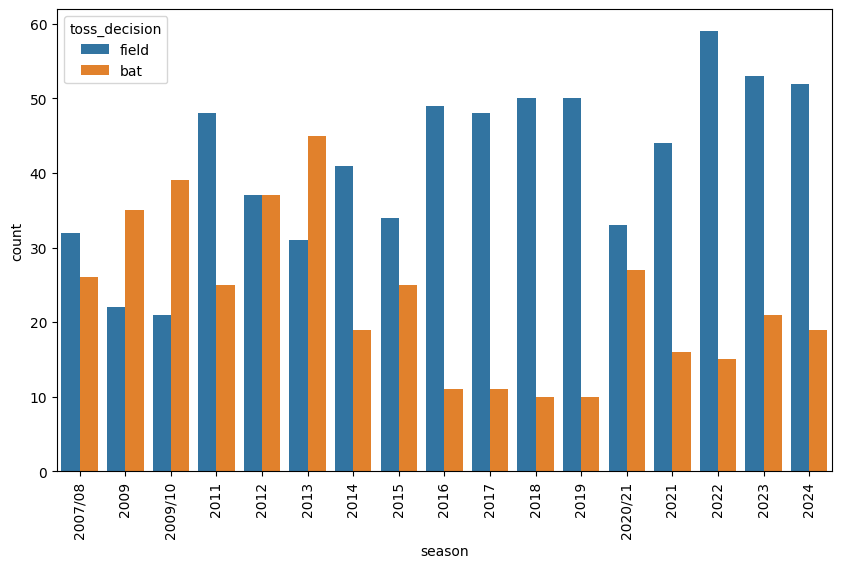

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

>> It seems during the initial years, teams wanted to bat first, but now most of the team choose to field first.Look at the 2016 season, most of the toss decisions are to field first.

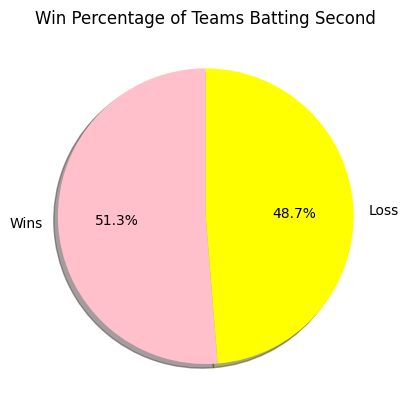

In [69]:
# Since there is a very strong trend towards batting second , Now let us see the win percentage of teams batting second.

chasing_team=matches_df[matches_df['toss_decision']=='field']
num_of_wins=(chasing_team['winner']==chasing_team['team2']).sum()
num_of_loss = (chasing_team['winner'] == chasing_team['team1']).sum()
labels = ['Wins', 'Loss']
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins / total) * 100, (num_of_loss / total) * 100]
colors = ['pink', 'yellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Win Percentage of Teams Batting Second')
plt.show()


>> So percentage of times teams batting second has won is 51.3. 

### Top Umpires:

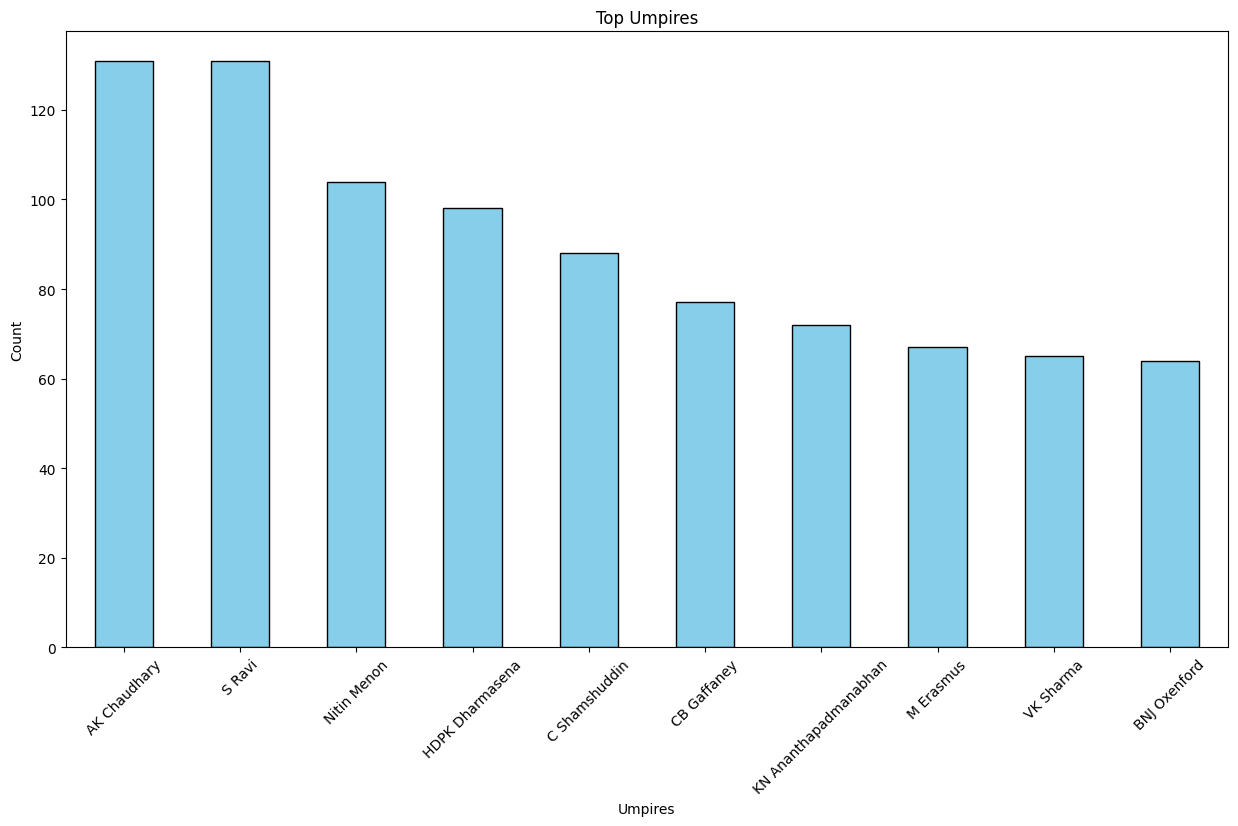

In [70]:

umpire_counts = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts().head(10)

plt.figure(figsize=(15,8))
umpire_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Umpires")
plt.ylabel("Count")
plt.title("Top Umpires")
plt.xticks(rotation=45)
plt.show()


## Deliveries Dataset

In [71]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### Batsman Analysis

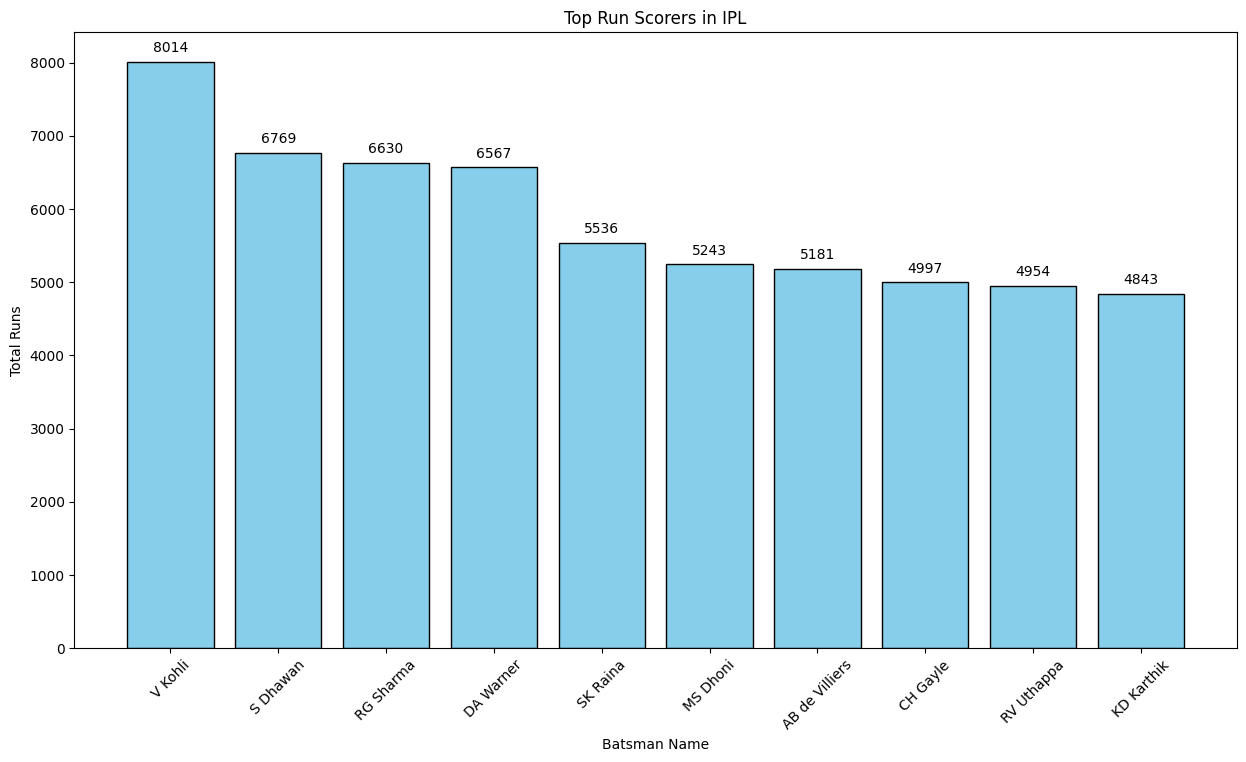

In [72]:
# Compute top 10 batsmen by total runs
top_batsmen = deliveries_df.groupby('batter')['batsman_runs'].sum().nlargest(10)

fig, ax = plt.subplots(figsize=(15,8))

bars = ax.bar(top_batsmen.index, top_batsmen.values, color='skyblue', edgecolor='black')

ax.bar_label(bars, fmt='%d', padding=5)

ax.set_xlabel("Batsman Name")
ax.set_ylabel("Total Runs")
ax.set_title("Top Run Scorers in IPL")
plt.xticks(rotation=45)

plt.show()


>> Virat Kholi is leading in top run Scorers in IPL followed by S Dhawan 

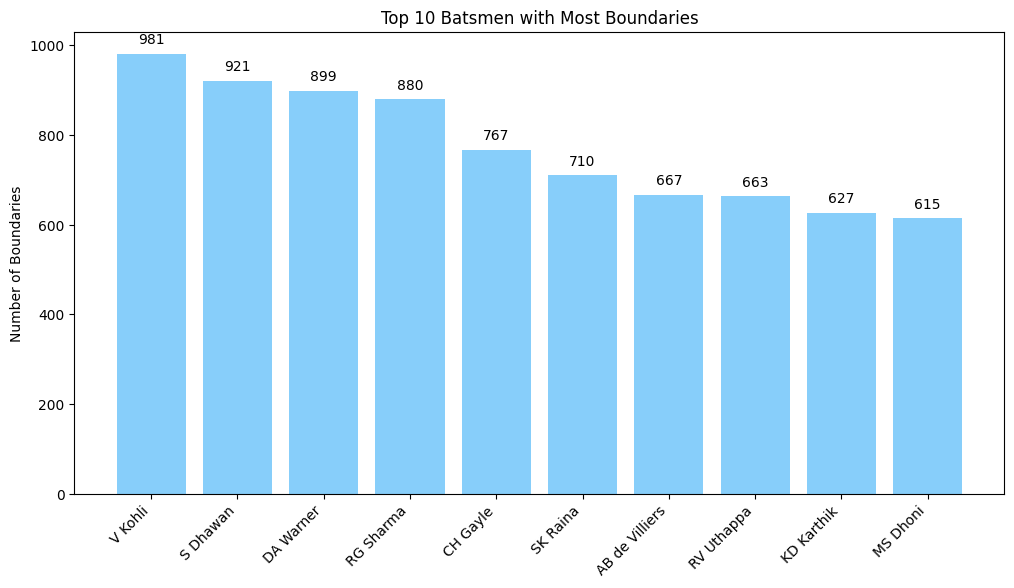

In [73]:
# Now let us see the players with more number of boundaries in IPL.

if 'batsman' in deliveries_df.columns:
    column_name = 'batsman'
elif 'batter' in deliveries_df.columns:
    column_name = 'batter'
else:
    raise KeyError("Neither 'batsman' nor 'batter' found in DataFrame!")

# Filter for boundaries (fours and sixes)
boundaries_df = deliveries_df[deliveries_df['batsman_runs'].isin([4, 6])]

boundary_counts = boundaries_df.groupby(column_name)['batsman_runs'].count().reset_index()

top_boundary_batsmen = boundary_counts.sort_values(by='batsman_runs', ascending=False).head(10)

labels = top_boundary_batsmen[column_name]
values = top_boundary_batsmen['batsman_runs']

fig, ax = plt.subplots(figsize=(12,6))

rects = ax.bar(labels, values, color='lightskyblue')

plt.xticks(rotation=45, ha='right')

ax.bar_label(rects, fmt='%d', padding=5)

ax.set_ylabel("Number of Boundaries")
ax.set_title("Top 10 Batsmen with Most Boundaries", fontsize=12)

plt.show()


>> Virat Kholi in the chart have hit the most boundaries (fours and sixes), followed by Sikhar Dhawan and a foreign player David Warner.

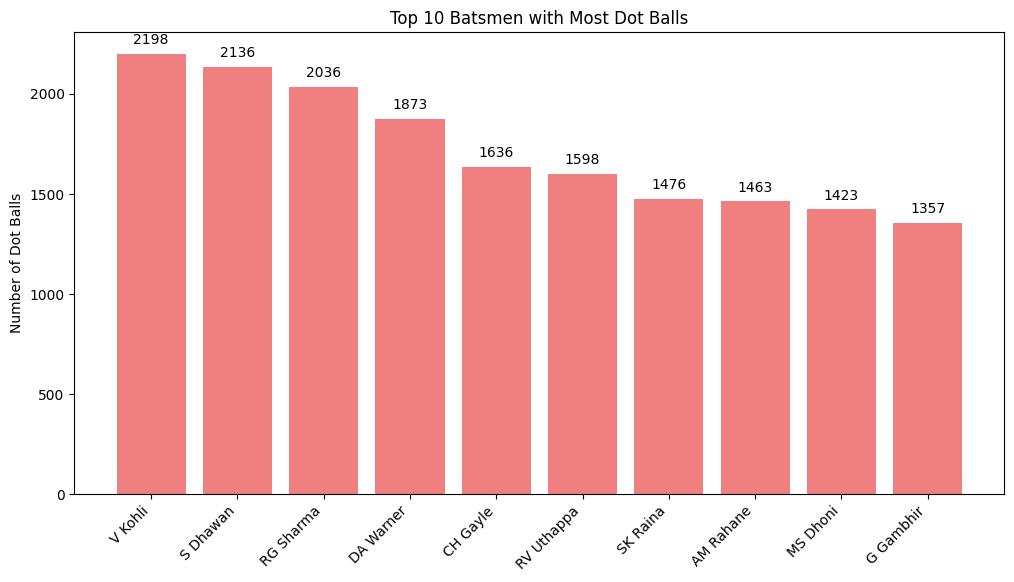

In [74]:
# Now let us see the player with the most no of Dot Balls
if 'batsman' in deliveries_df.columns:
    column_name='batsman'
elif 'batter' in deliveries_df.columns:
    column_name='batter'
else:
    raise KeyError("Neither 'batsman' nor 'batter' found in DataFrame!")
dot_balls_df=deliveries_df[deliveries_df['batsman_runs']==0]

dot_ball_counts=dot_balls_df.groupby(column_name)['batsman_runs'].count().reset_index()

top_dot_ball_batsmen=dot_ball_counts.sort_values(by='batsman_runs',ascending=False).head(10)

labels=top_dot_ball_batsmen[column_name]
values=top_dot_ball_batsmen['batsman_runs']

fig, ax = plt.subplots(figsize=(12,6))
rects = ax.bar(labels, values, color='lightcoral')

plt.xticks(rotation=45, ha='right')

ax.bar_label(rects, fmt='%d', padding=5)

ax.set_ylabel("Number of Dot Balls")
ax.set_title("Top 10 Batsmen with Most Dot Balls", fontsize=12)

plt.show()


>> It is interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

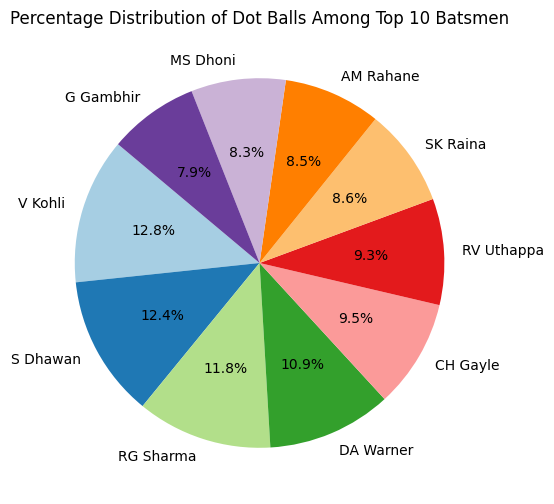

In [75]:
# Calculate percentage distribution of Dot Balls
percentages = (values / values.sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(percentages, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)

ax.set_title("Percentage Distribution of Dot Balls Among Top 10 Batsmen", fontsize=12)

plt.show()


## Bowler Analysis
#### Now let us see the bowlers who has bowled most number of balls in IPL.

In [89]:
if 'bowler' not in deliveries_df.columns:
    raise KeyError("Bowler column not foundin Data!")
#Exclude wide and no balls from count
valid_df=deliveries_df[~deliveries_df['extras_type'].isin(['wides','noballs'])]
valid_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


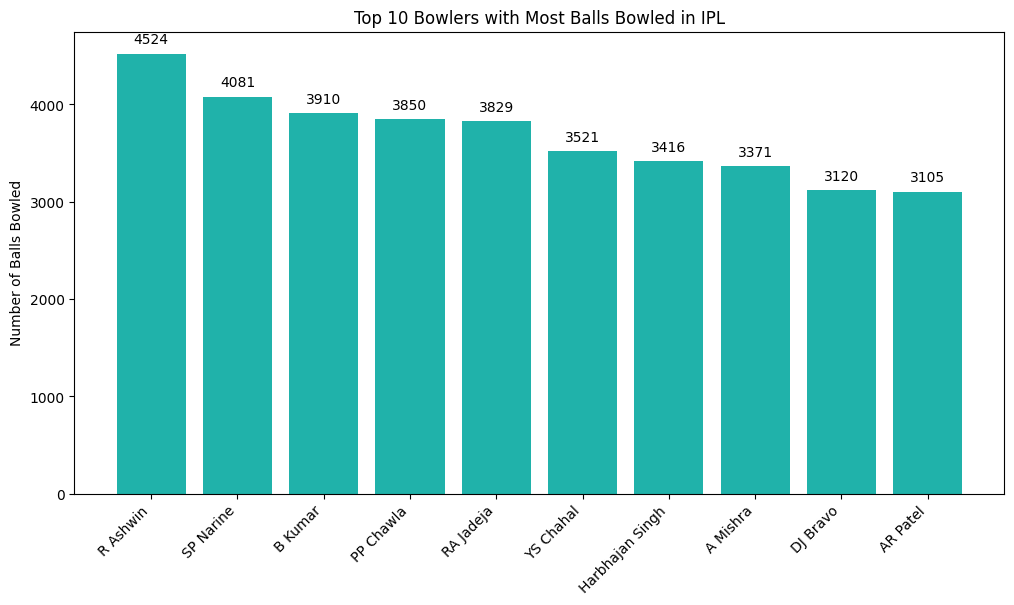

In [90]:
bowler_ball_counts=valid_df.groupby('bowler').size().reset_index(name='balls_bowled')
top_bowler=bowler_ball_counts.sort_values(by='balls_bowled',ascending=False).head(10)

label=top_bowler['bowler']
values=top_bowler['balls_bowled']

fig,ax=plt.subplots(figsize=(12,6))
rects=ax.bar(labels,values,color='lightseagreen')

plt.xticks(rotation=45, ha='right')

ax.bar_label(rects, fmt='%d', padding=5)

ax.set_ylabel("Number of Balls Bowled")
ax.set_title("Top 10 Bowlers with Most Balls Bowled in IPL", fontsize=12)

plt.show()

>> R Ashwin is the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls

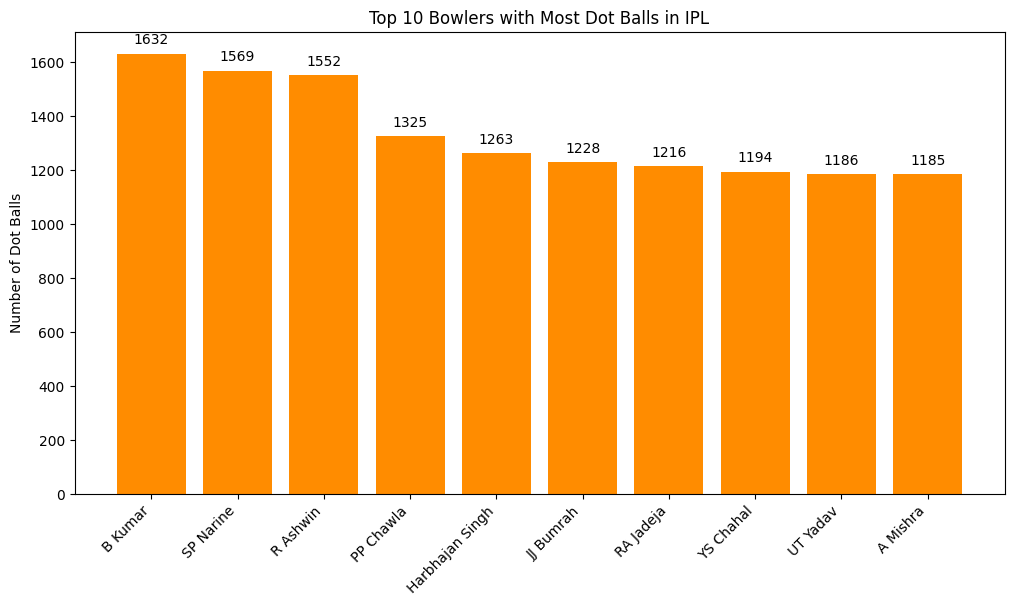

In [93]:
dot_balls_df=deliveries_df[deliveries_df['total_runs']==0]
dot_balls_counts=dot_balls_df.groupby('bowler').size().reset_index(name='dot_balls')
top_dot_bowlers=dot_balls_counts.sort_values(by='dot_balls',ascending=False).head(10)
labels = top_dot_bowlers['bowler']
values = top_dot_bowlers['dot_balls']

fig, ax = plt.subplots(figsize=(12,6))

rects = ax.bar(labels, values, color='darkorange')

plt.xticks(rotation=45, ha='right')

ax.bar_label(rects, fmt='%d', padding=5)

ax.set_ylabel("Number of Dot Balls")
ax.set_title("Top 10 Bowlers with Most Dot Balls in IPL", fontsize=12)

plt.show()

>> Bhuvneshwar Kumar is the one with more number of dot balls followed by Sunil Narine and R Ashwin

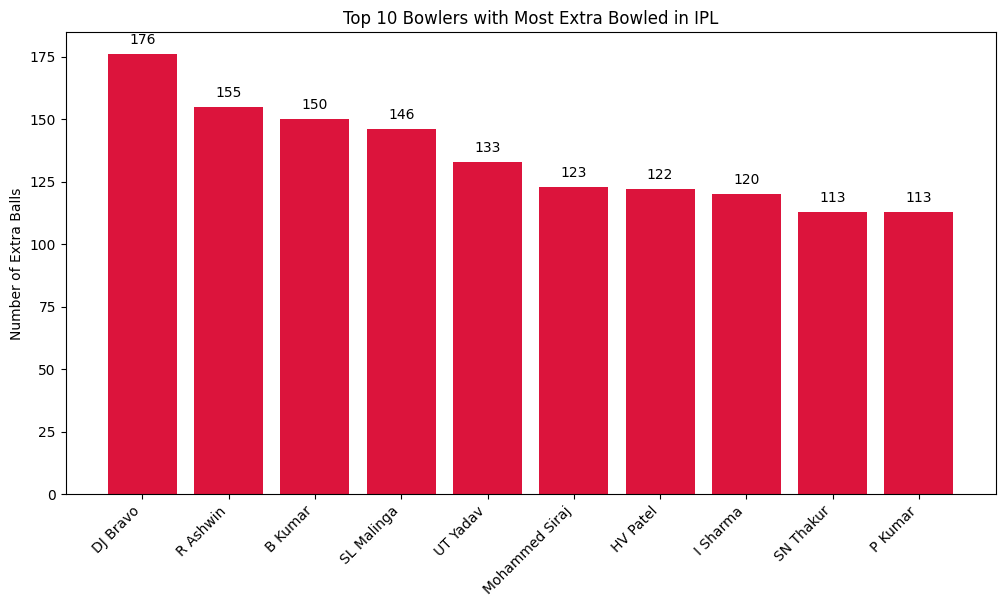

In [103]:
# Now let us see the bowlers who has bowled more numbers of extras in IPL

extra_df=deliveries_df[deliveries_df['extras_type'].isin(['wides','noballs'])]
extra_balls_counts=extra_df.groupby('bowler').size().reset_index(name='extra_balls')

top_extra_baller=extra_balls_counts.sort_values(by='extra_balls',ascending=False).head(10)

labels=top_extra_baller['bowler']
values=top_extra_baller['extra_balls']

fig,ax=plt.subplots(figsize=(12,6))

rects=ax.bar(labels,values,color='crimson')

plt.xticks(rotation=45,ha='right')

ax.bar_label(rects,fmt='%d',padding=5)

ax.set_ylabel("Number of Extra Balls")
ax.set_title("Top 10 Bowlers with Most Extra Bowled in IPL",fontsize=12)
plt.show()


>> DJ Bravo tops the chart with 176 extra runs followed by R Ashwin.

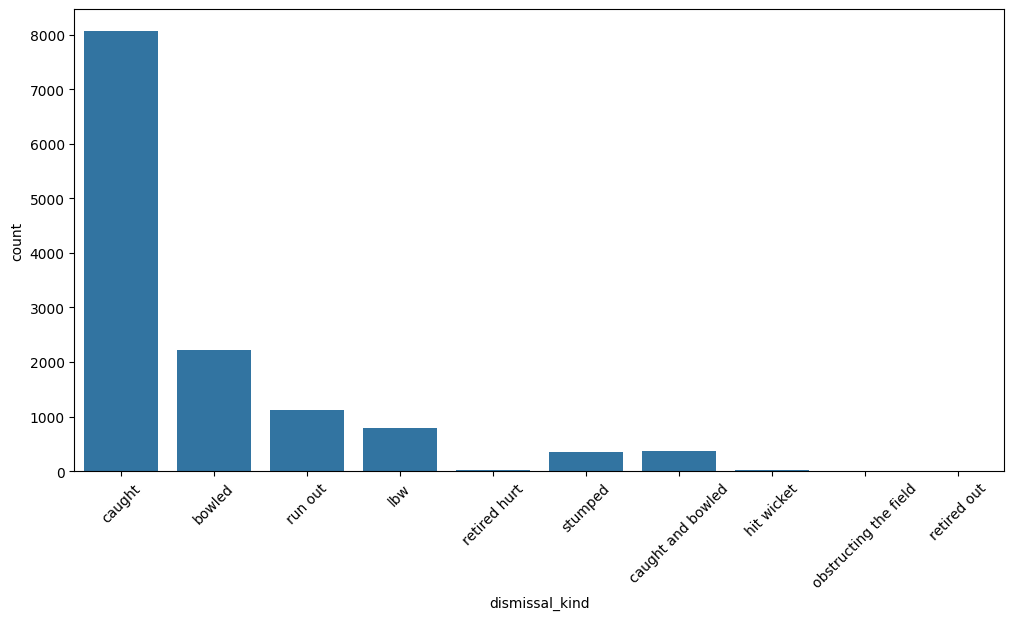

In [111]:
#Now let us see the most common dismissal types in IPL

plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind',data=deliveries_df)
plt.xticks(rotation=45)
plt.show()


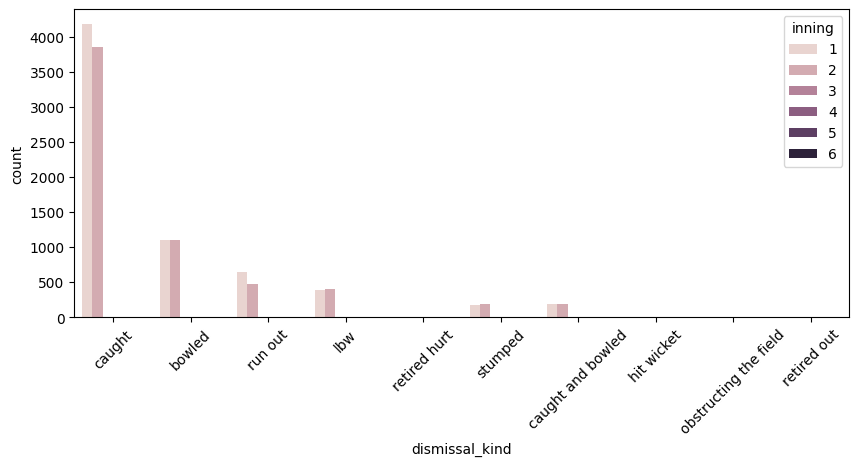

In [117]:
plt.figure(figsize=(10,4))
sns.countplot(x='dismissal_kind',data=deliveries_df,hue='inning')
plt.xticks(rotation=45)
plt.show()


## Most High-Scoring Grounds 


C:\Users\Aryanaman\AppData\Local\Temp\ipykernel_7424\1065663499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_scoring_grounds['target_runs'], y=high_scoring_grounds['venue'], palette='Blues_r')


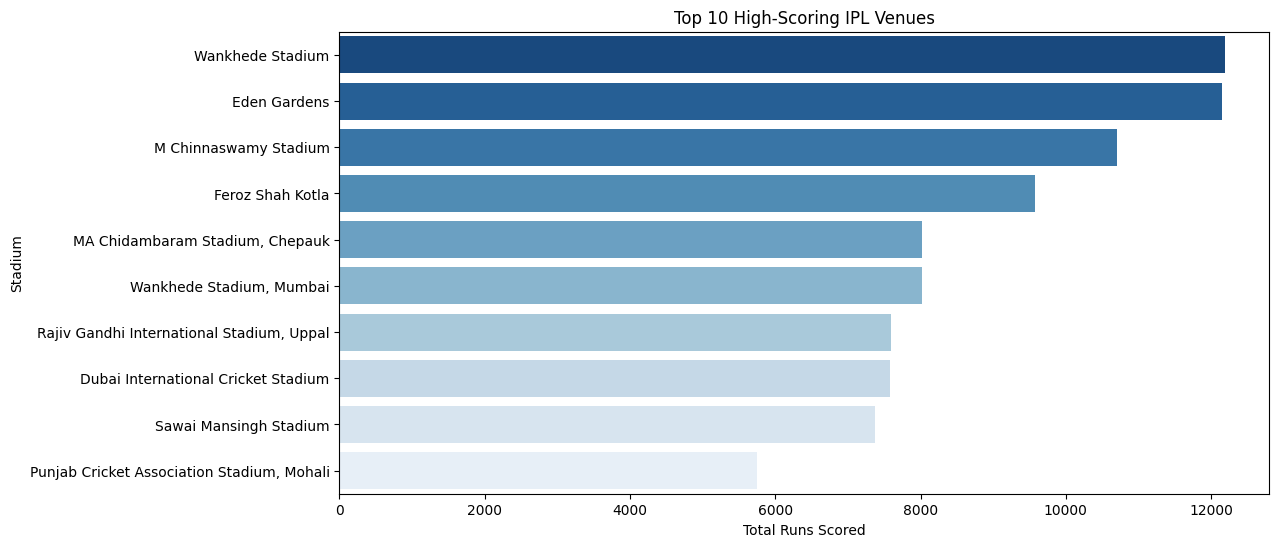

In [134]:
high_scoring_grounds = matches_df.groupby('venue')['target_runs'].sum().reset_index()

# Sort by total runs and select top 10
high_scoring_grounds = high_scoring_grounds.sort_values(by='target_runs', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=high_scoring_grounds['target_runs'], y=high_scoring_grounds['venue'], palette='Blues_r')
plt.xlabel("Total Runs Scored")
plt.ylabel("Stadium")
plt.title("Top 10 High-Scoring IPL Venues")
plt.show()

## END ##

# THANK YOU 
##### By Aryan Aman